In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
#from pmdarima import auto_arima

# Load dataset (update file path)
df = pd.read_csv(r"C:\Users\jay\Desktop\Kwanza Tukule\Data\Cleaned_data.csv", parse_dates=["DATE"])

# Ensure datetime index
df.set_index("DATE", inplace=True)

# Extract month-year for grouping
df["Month_Year"] = df.index.to_period("M")

In [2]:
df.head()

,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month_Year
DATE,,,,,,,
2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850,2024-08
2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910,2024-08
2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670,2024-08
2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605,2024-08
2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480,2024-08


In [67]:
location_counts = df['ANONYMIZED LOCATION'].value_counts()
location_counts.head(20)

ANONYMIZED LOCATION
Location-689f    43890
Location-3e32    30420
Location-e2f8    25687
Location-3fc0    23033
Location-1979    17334
Location-f37d    17311
Location-4ea1    16999
Location-47dc    16745
Location-b27b    16725
Location-1ba8    14516
Location-03fc    14308
Location-66f4    13118
Location-d32a    12515
Location-128a    10937
Location-c2f2    10470
Location-7f37    10377
Location-b125     6177
Location-1c33     4958
Location-0451     3526
Location-d1a8     2825
Name: count, dtype: int64

In [15]:
# Calculate Total Sales Value
df['TOTAL SALES'] = df['QUANTITY'] * df['UNIT PRICE']

# Grouping by Location, Category, and Product to analyze sales
location_analysis = df.groupby('ANONYMIZED LOCATION').agg({
    'TOTAL SALES': 'sum',
    'QUANTITY': 'sum'
}).reset_index()


# Displaying the analysis results
print("Location Analysis:")
top20_locations = location_analysis.sort_values(by = "TOTAL SALES", ascending = False).head(20)
top20_locations

Location Analysis:


,ANONYMIZED LOCATION,TOTAL SALES,QUANTITY
20,Location-689f,264213092,106703
13,Location-3e32,202712411,78877
14,Location-3fc0,116801259,50175
44,Location-e2f8,112343184,51741
19,Location-66f4,84091730,34546
1,Location-03fc,83811343,35789
8,Location-1ba8,76033031,34039
50,Location-f37d,69834063,32860
15,Location-47dc,67470482,29267
33,Location-b27b,67250783,30319


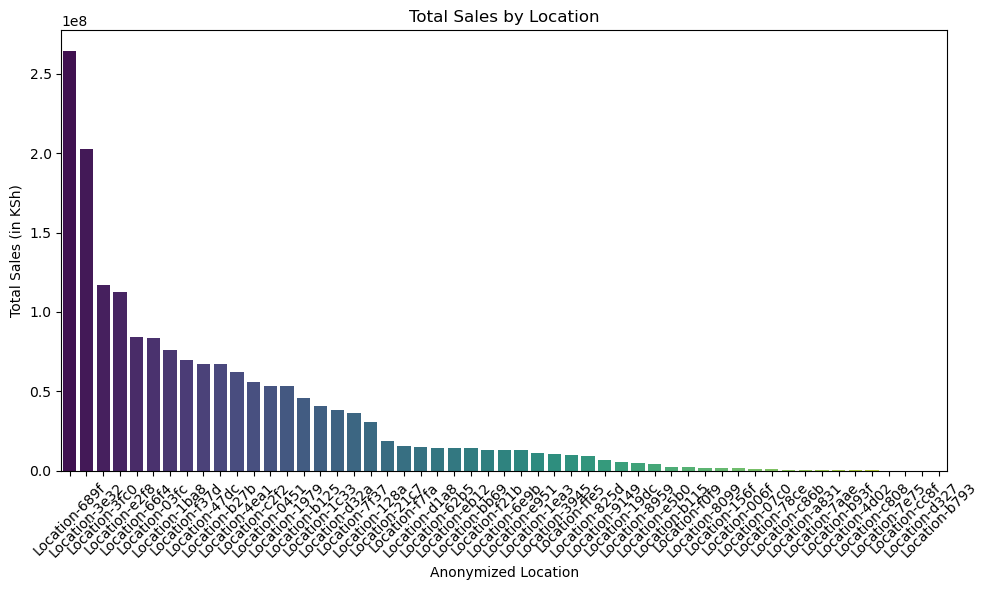

In [13]:
# Visualization: Total Sales by Location
plt.figure(figsize=(10, 6))
sns.barplot(data=location_analysis.sort_values(by = "TOTAL SALES", ascending = False), x='ANONYMIZED LOCATION', y='TOTAL SALES', hue ='ANONYMIZED LOCATION', palette='viridis')
plt.title('Total Sales by Location')
plt.xlabel('Anonymized Location')
plt.ylabel('Total Sales (in KSh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
top20_list = top20_locations["ANONYMIZED LOCATION"].astype(str).to_list()
top20_list

['Location-689f',
 'Location-3e32',
 'Location-3fc0',
 'Location-e2f8',
 'Location-66f4',
 'Location-03fc',
 'Location-1ba8',
 'Location-f37d',
 'Location-47dc',
 'Location-b27b',
 'Location-4ea1',
 'Location-c2f2',
 'Location-0451',
 'Location-1979',
 'Location-b125',
 'Location-1c33',
 'Location-d32a',
 'Location-7f37',
 'Location-128a',
 'Location-21c7']

In [84]:
# Calculate Total Sales Value
df['TOTAL SALES'] = df['QUANTITY'] * df['UNIT PRICE']

# Specify the locations you want to analyze
selected_locations = top20_list

# Filter the DataFrame for the selected locations
filtered_df = df[df['ANONYMIZED LOCATION'].isin(selected_locations)]

# Grouping by Business to analyze performance
business_analysis = filtered_df.groupby('ANONYMIZED BUSINESS').agg({
    'TOTAL SALES': 'sum',
    'QUANTITY': 'sum',
    'UNIT PRICE': 'mean'  # Average unit price for the business
}).reset_index()
business_analysis.sort_values(by = "TOTAL SALES", ascending = False).head(20)

,ANONYMIZED BUSINESS,TOTAL SALES,QUANTITY,UNIT PRICE
2605,Business-978e,28037358,13991,1903.858837
4302,Business-fe7d,26997121,6743,3982.748851
1688,Business-6068,16464195,8214,2311.655360
136,Business-07de,16258068,6065,2606.785345
2114,Business-7a03,13968451,6318,2217.895379
3163,Business-ba13,13650016,5533,2621.485135
532,Business-1e3e,13192967,4981,2670.222892
4117,Business-f4f4,11952941,3852,2609.010791
1513,Business-5613,11895552,4089,2948.963821
2247,Business-8119,11727274,3788,2880.522427


In [51]:
business_analysis = df.groupby(["ANONYMIZED LOCATION",'ANONYMIZED BUSINESS']).agg({
    'TOTAL SALES': 'sum',
}).reset_index()
business_analysis.sort_values(by = "TOTAL SALES", ascending = False).head(20)

,ANONYMIZED LOCATION,ANONYMIZED BUSINESS,TOTAL SALES
1125,Location-1c33,Business-978e,28037358
3044,Location-689f,Business-fe7d,26997121
4328,Location-e2f8,Business-6068,16464195
3546,Location-b27b,Business-07de,16258068
1838,Location-3fc0,Business-7a03,13968451
1579,Location-3e32,Business-ba13,13650016
40,Location-03fc,Business-1e3e,13192967
4478,Location-e951,Business-468e,12546597
1693,Location-3e32,Business-f4f4,11952941
1380,Location-3e32,Business-5613,11895552


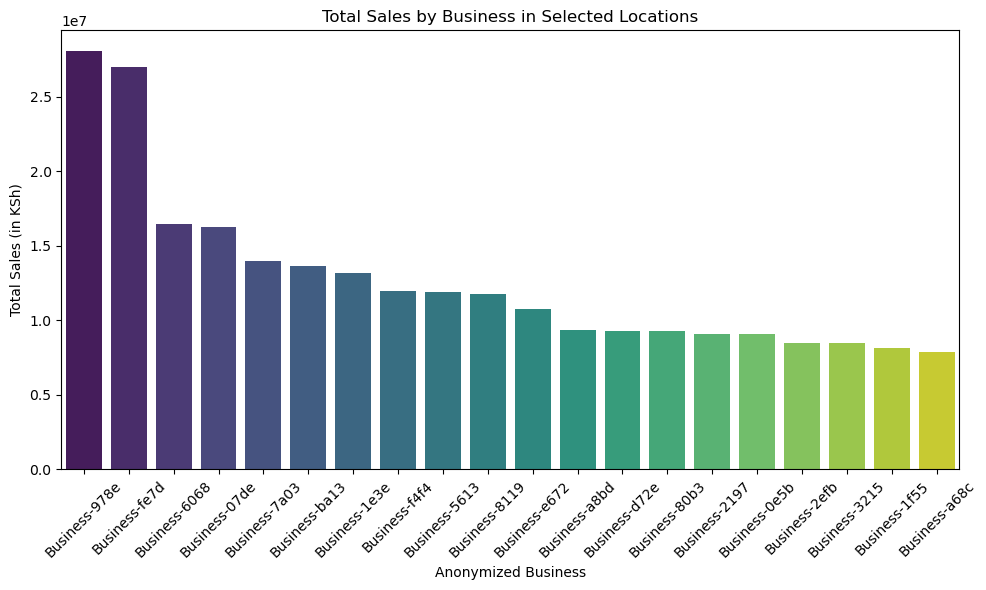

In [99]:
# Visualization: Total Sales by Business
plt.figure(figsize=(10, 6))
sns.barplot(data=business_analysis.sort_values(by = "TOTAL SALES", ascending = False).head(20), x='ANONYMIZED BUSINESS', y='TOTAL SALES', hue = "ANONYMIZED BUSINESS", palette='viridis')
plt.title('Total Sales by Business in Selected Locations')
plt.xlabel('Anonymized Business')
plt.ylabel('Total Sales (in KSh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
# Grouping by Product to analyze performance
product_analysis = filtered_df.groupby('ANONYMIZED PRODUCT').agg({
    'TOTAL SALES': 'sum',
    'QUANTITY': 'sum',
    'UNIT PRICE': 'mean'  # Average unit price for the product
}).reset_index()


print("\nProduct Performance Analysis by Selected Locations:")
product_analysis.sort_values(by = "TOTAL SALES", ascending = False).head(20)


Product Performance Analysis by Selected Locations:


,ANONYMIZED PRODUCT,TOTAL SALES,QUANTITY,UNIT PRICE
738,Product-e805,261386662,42397,6133.995979
470,Product-8f75,158073275,37403,4238.306937
333,Product-66e0,70689210,46947,1511.295282
124,Product-29ee,67757511,35685,1896.991185
209,Product-4156,56496732,28275,1989.194357
786,Product-faa5,55391210,12684,4382.400995
105,Product-2175,52189170,11897,4404.962385
667,Product-d09c,48929427,17706,2746.922112
141,Product-3050,44648655,23729,1880.757701
574,Product-b31e,38986229,8866,4395.186451


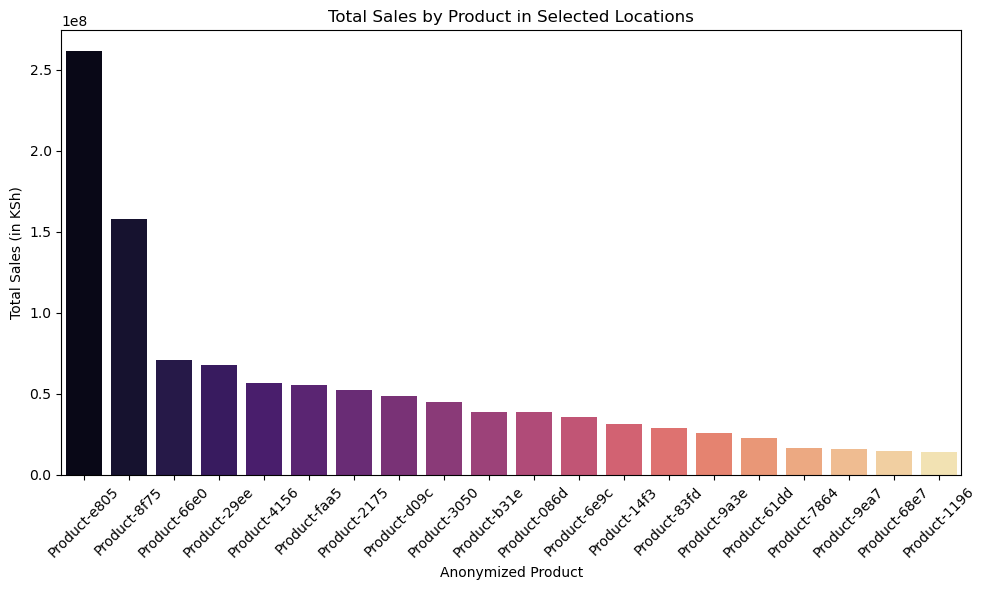

In [103]:
# Visualization: Total Sales by Product
plt.figure(figsize=(10, 6))
sns.barplot(data=product_analysis.sort_values(by = "TOTAL SALES", ascending = False).head(20), x='ANONYMIZED PRODUCT', y='TOTAL SALES', hue = "ANONYMIZED PRODUCT", palette='magma')
plt.title('Total Sales by Product in Selected Locations')
plt.xlabel('Anonymized Product')
plt.ylabel('Total Sales (in KSh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()